# **Clustering**

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
config = {}
config['latentDim'] = 64
config['prediction_path'] = '/content/drive/MyDrive/UpWork/ChepVAE/10230/prediction_rotation.csv'
config['output_path'] = '/content/drive/MyDrive/UpWork/ChepVAE/10230/prediction_rotation_cluster.csv'

col_names = ['vec_' + str(i) for i in range(config['latentDim'])]

In [3]:
prediction = pd.read_csv(config['prediction_path'])

In [4]:
prediction.head()

,Filename,index,vec_0,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,vec_10,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20,vec_21,vec_22,vec_23,vec_24,vec_25,vec_26,vec_27,vec_28,vec_29,vec_30,vec_31,vec_32,vec_33,vec_34,vec_35,vec_36,vec_37,vec_38,vec_39,vec_40,vec_41,vec_42,vec_43,vec_44,vec_45,vec_46,vec_47,vec_48,vec_49,vec_50,vec_51,vec_52,vec_53,vec_54,vec_55,vec_56,vec_57,vec_58,vec_59,vec_60,vec_61,vec_62,vec_63
0,FoilHole_14817225_Data_14817538_14817539_20170...,0,1.217718,1.322995,-0.327488,-1.553602,-0.661208,0.251110,0.596469,-0.722676,1.309523,0.245510,1.431507,-0.346335,0.063994,1.650861,-1.606353,1.873913,-1.652345,-0.507921,1.221787,-0.725220,0.494489,-0.735370,-0.690009,1.202017,0.019955,-0.446306,-0.775219,-0.515863,-0.760983,-1.383443,0.765809,-0.832557,-0.851560,-1.247231,-0.708601,-0.283938,-0.317967,0.264386,-0.258686,0.508062,-0.825944,-0.366636,0.004249,2.726404,-0.957029,-0.430162,1.961676,0.659419,0.716105,-1.329902,1.243325,-0.379695,0.611603,1.350266,0.117453,-1.423102,1.776206,-1.298586,1.878790,-0.071801,2.500411,-0.158145,-0.288954,0.008359
1,FoilHole_14817225_Data_14817538_14817539_20170...,1,1.883374,-0.185295,-0.466448,0.353619,-0.701658,1.921322,-1.327127,1.646603,-0.376904,0.474669,-0.697083,-0.209638,-1.112682,-0.474429,-1.542029,0.355967,0.146833,0.272668,-0.380744,-1.515116,-1.362041,-0.163431,0.717318,-0.239005,0.003394,0.973626,-0.659380,-0.401330,0.890897,-0.762568,0.324759,0.000047,0.628363,1.194242,-2.067584,1.527546,-0.370640,1.593097,0.027994,-1.185521,-1.101840,-0.521685,0.364295,-0.978696,1.131434,-0.775251,0.299999,0.320688,0.353537,-3.441325,-0.678649,0.349723,0.693721,1.086158,-0.078373,0.127374,1.803145,1.338531,0.999229,0.212355,0.462170,0.426941,-0.286031,-0.706602
2,FoilHole_14817225_Data_14817538_14817539_20170...,2,-0.150498,-1.607404,0.629370,-1.939409,-0.937678,1.220683,2.490654,0.614444,-0.177838,-1.476391,-2.421367,0.004438,-1.876684,0.294057,-0.480709,1.749808,1.299342,0.943344,0.053674,0.401146,-0.141821,0.979081,-0.433688,0.992010,-1.395954,-0.336625,0.144715,-0.077982,0.599151,0.168776,-1.011180,-0.725385,-0.049019,1.494986,-0.042855,0.242644,-0.185873,-1.687050,0.470964,1.138738,-0.104054,0.359169,0.733960,-0.961977,-1.404572,0.826272,0.684496,-0.100900,0.493820,1.203800,0.893370,-0.577556,-0.305488,0.418913,-1.140111,1.353181,0.292410,-1.498091,-0.989644,0.980167,-0.556946,-0.195356,-0.088570,0.016742
3,FoilHole_14817225_Data_14817538_14817539_20170...,3,-0.411452,0.300483,-1.355595,0.980517,0.782789,-1.415510,1.183409,-0.868353,0.680156,-0.406410,0.551968,0.864592,0.112147,-0.737406,-0.611011,-0.690437,0.193051,-0.468516,-1.560246,-0.918653,1.074816,-0.252960,0.059536,-0.242334,-0.978926,-0.615792,-1.378372,-0.070531,0.329813,1.079083,-0.368101,-0.322168,1.099012,-0.011813,1.728940,-0.291779,0.474546,1.253979,0.702546,0.394373,-0.306887,1.205036,0.686748,-0.155549,-0.095352,-0.612597,0.988642,-1.122000,1.395768,-1.018218,0.120153,1.566325,-1.006321,-0.650217,0.202539,1.164057,1.002847,-0.148417,-1.583990,-0.033429,0.978927,-0.325292,1.070745,0.811079
4,FoilHole_14817225_Data_14817538_14817539_20170...,4,-2.098195,-1.306289,1.273777,1.482552,-1.068552,-0.854418,-0.161790,0.105865,0.193560,0.776139,1.267372,0.928908,-0.552356,0.359075,-1.095398,-0.431685,-1.222734,-1.053697,-1.277202,-0.028276,0.055554,-0.740906,0.403583,-2.072733,0.278851,-2.454696,0.123708,0.953351,1.688733,-0.225031,-0.579578,-1.739303,-1.088683,-1.227686,0.010529,-1.252847,-0.043159,-0.937181,0.340969,1.712852,-0.355362,-0.585468,-0.816203,0.643250,0.911546,-0.279549,1.043152,1.456355,0.284906,0.505201,-0.226459,-1.079763,-2.049159,2.144875,0.097775,0.079739,1.551180,0.205469,2.700402,0.188901,0.620782,-0.909936,-0.712781,0.385247


In [5]:
kmeans_cluster = KMeans(n_clusters=20, random_state=0)
kmeans_cluster.fit(prediction[col_names].values)
prediction['cluster'] = kmeans_cluster.labels_
prediction[['Filename', 'index', 'cluster'] + col_names].to_csv(config['output_path'], index=False)

In [6]:
data_vis = prediction.sample(n=1000, replace=False)
tsne = TSNE(n_components=2, verbose=1, perplexity=25)
X_embedded = tsne.fit_transform(data_vis[col_names].values)
data_vis[['dim1', 'dim2']] = X_embedded

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.011s...
[t-SNE] Computed neighbors for 1000 samples in 0.168s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.281312
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.607391
[t-SNE] KL divergence after 1000 iterations: 2.875259


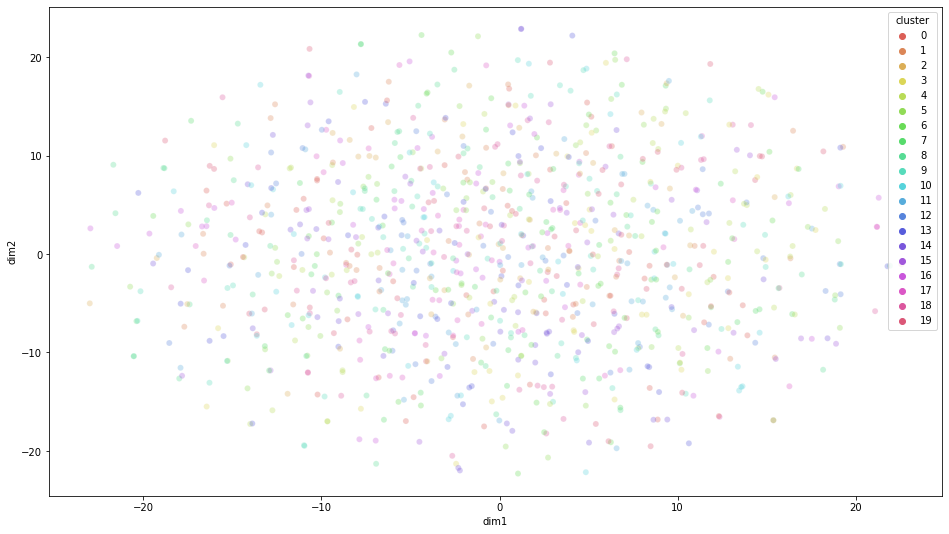

In [7]:
plt.figure(figsize=(16,9))
sns.scatterplot(
    x="dim1", y="dim2",
    hue="cluster",
    palette=sns.color_palette("hls", 20),
    data=data_vis,
    legend="full",
    alpha=0.3
)